# My Tu Verras Project

## 1. Importing data
**Importing needed libraries**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing data**

In [50]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [51]:
def load_dataframe(dataset):
    df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
    df['MEDV'] = dataset['target']
    return df

boston_dataframe = load_dataframe(dataset)

print(boston_dataframe[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

## 2. Cleaning and Pre-processing

In [52]:
def count_missing_values(boston_dataframe):
    missing_values_counter = boston_dataframe.isna().sum().sum()
    return missing_values_counter
    
print(count_missing_values(boston_dataframe))

0


## 3. Data Analysis
**Histograms of each attribute**

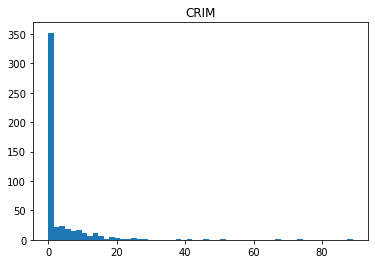

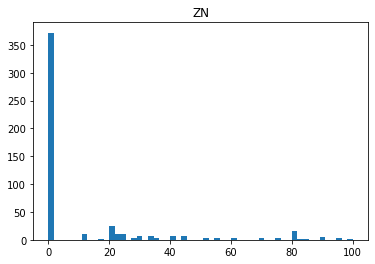

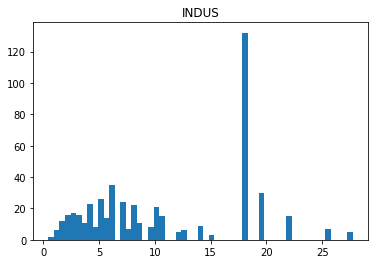

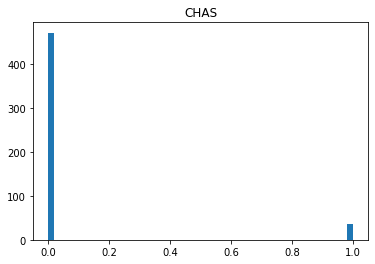

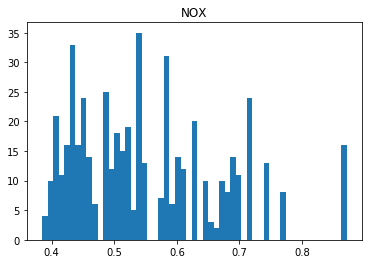

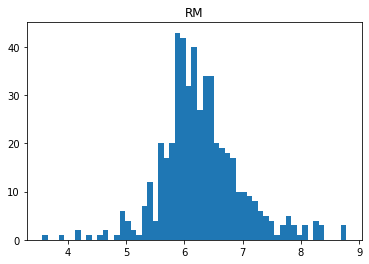

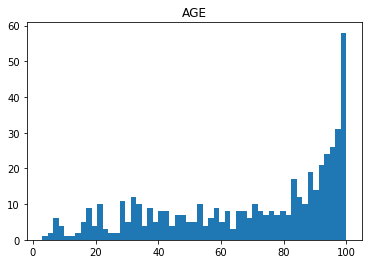

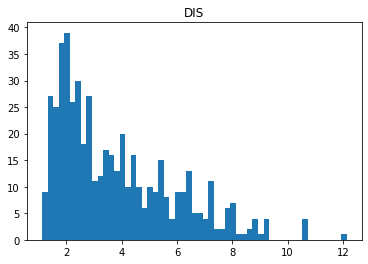

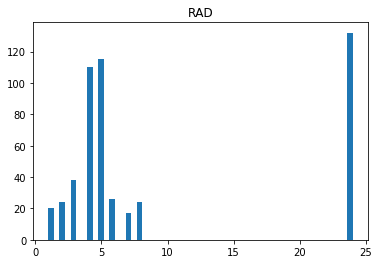

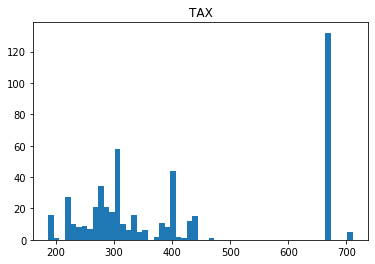

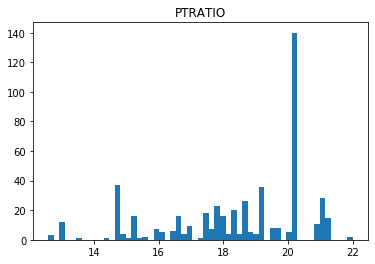

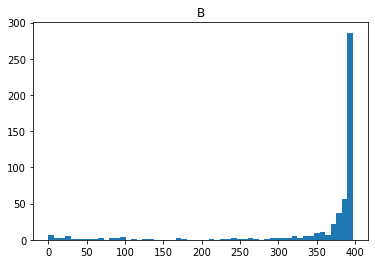

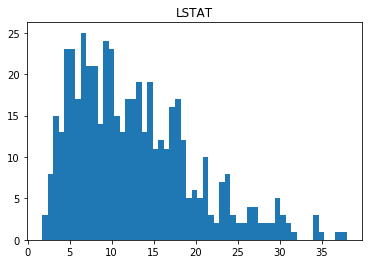

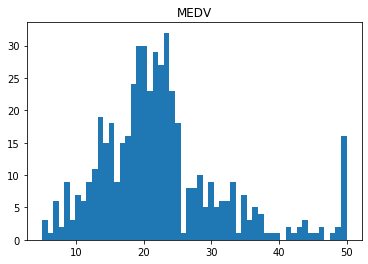

In [53]:
for (columnName, columnData) in boston_dataframe.iteritems():
    #print(columnName)
    plt.hist(columnData, bins = 55)
    plt.title(columnName)
    plt.show()

## 4. Looking for correlation
### 4.1. Pearson Correlation Matrix

In [57]:
from scipy.stats import pearsonr
def compute_correlations_matrix(boston_dataframe):
    df = pd.DataFrame(boston_dataframe, index=boston_dataframe.columns, columns=boston_dataframe.columns)
    print(df.)
    for (columnName1, columnData1) in boston_dataframe.iteritems():
        for (columnName2, columnData2) in boston_dataframe.iteritems():
            corr, _ = pearsonr(columnData1, columnData2)
            df[columnName1][columnName2] = corr
    return df

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


*MEDV (median value) has the highest correlation with RM (number of rooms), which is 0.695360*

 *MEDV (median value) has the lowest correlation with LSTAT (lower status of the population), which is -0.737663*

### 4.2. Correlation Matrix Graphs (Scatter Matrix)

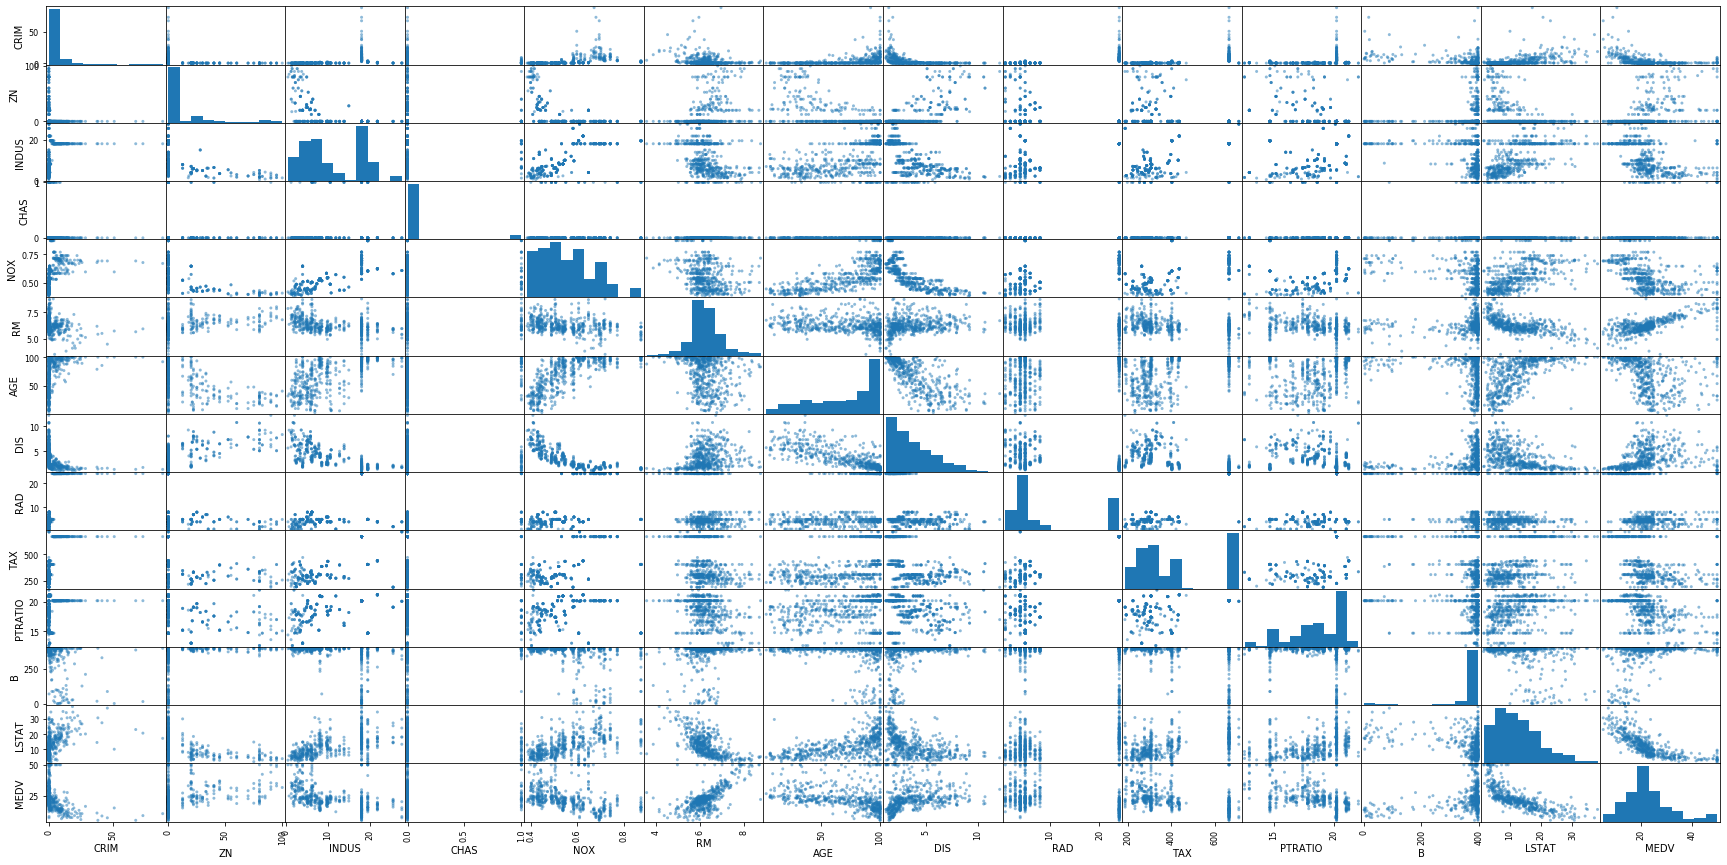

In [66]:
pd.plotting.scatter_matrix(boston_dataframe, figsize=(30,15))
plt.show()

### 4.3. MEDV in function of RM
*Since the most linearly correlated feature is the average number of rooms, we will focus on the plot of MEDV as a function of RM.*

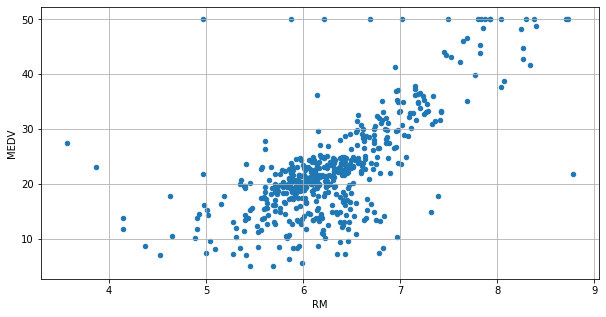

In [76]:
#plt.scatter(boston_dataframe['RM'], boston_dataframe['MEDV'])
#boston_dataframe['RM', 'MEDV'].plot()
boston_dataframe.plot(kind='scatter', x='RM', y='MEDV', figsize=(10,5), grid=True)
plt.show()

### 4.4. MEDV in function of  LSTAT, AGE, and CRIME

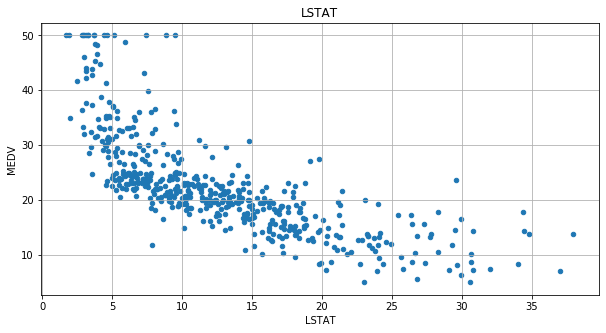

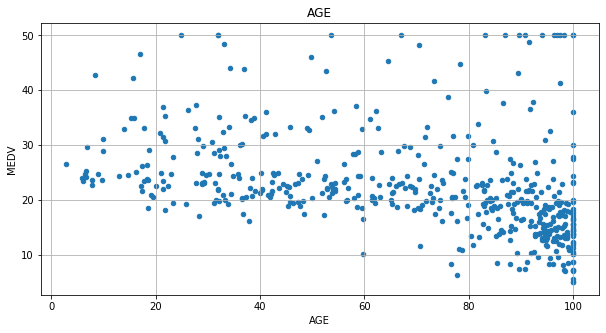

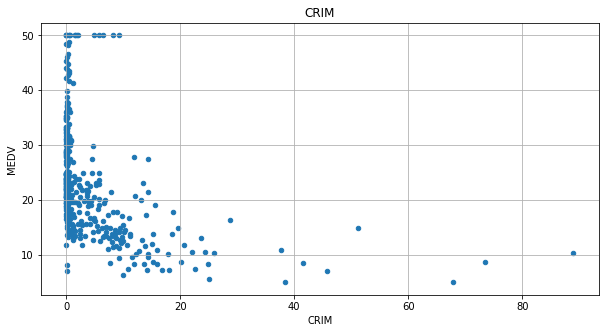

In [79]:
for x_axis in ['LSTAT', 'AGE', 'CRIM']:
    boston_dataframe.plot(kind='scatter', x=x_axis, y='MEDV', figsize=(10,5), grid=True)
    plt.title(x_axis)
    plt.show()


*Printing correlations of every attribute and LSTAT*

In [80]:
print(correlations['LSTAT'])

CRIM       0.455621
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MEDV      -0.737663
Name: LSTAT, dtype: float64


*INDUS, AGE and NOX have the highest correlations with LSTAT. Now here are the graphs of them*

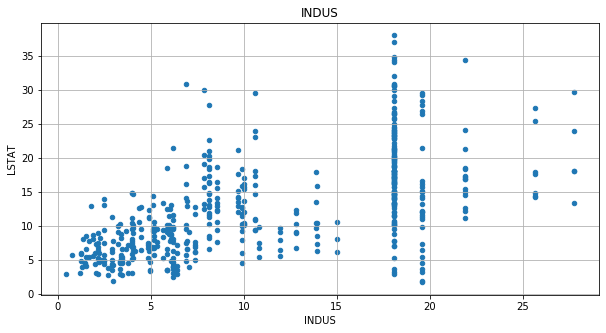

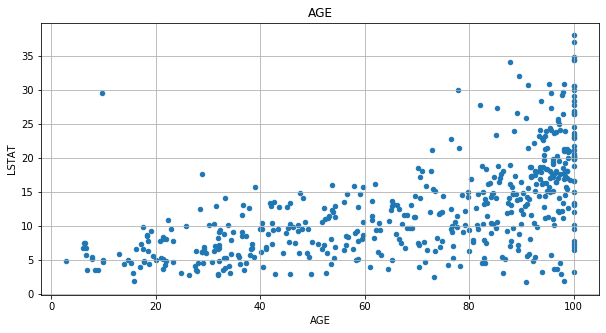

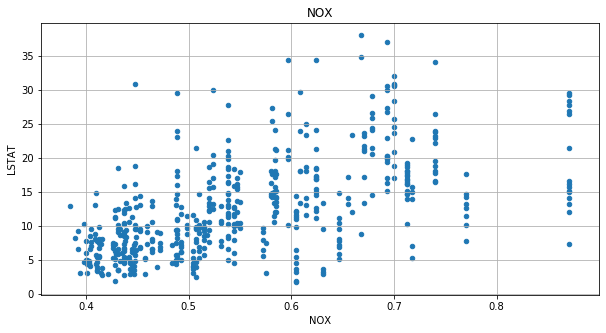

In [82]:
for x_axis in ['INDUS', 'AGE', 'NOX']:
    boston_dataframe.plot(kind='scatter', x=x_axis, y='LSTAT', figsize=(10,5), grid=True)
    plt.title(x_axis)
    plt.show()